In [1]:
import nltk
import re
import string
import matplotlib.pyplot as plt

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#loading tweets
neutral_tweets = nltk.corpus.twitter_samples.strings('tweets.20150430-223406.json')#considering this neutral
neg_tweets = nltk.corpus.twitter_samples.strings('negative_tweets.json')
pos_tweets = nltk.corpus.twitter_samples.strings('positive_tweets.json')

In [5]:
#counting number of positive, negative, and neutral tweets
total_pos_tweets=len(pos_tweets)
total_neg_tweets=len(neg_tweets)
total_neutral_tweets=len(neutral_tweets)

**1.1**

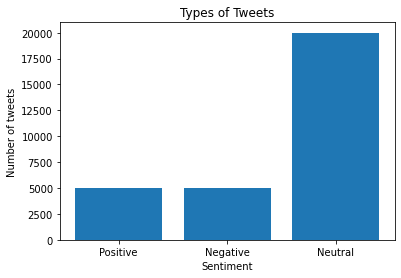

In [6]:
#displaying total number of positive negative and neutral tweets
labels=['Positive','Negative','Neutral']
values=[total_pos_tweets,total_neg_tweets,total_neutral_tweets]
plt.bar(labels,values)
plt.title("Types of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of tweets")
plt.show()

In [7]:
#making a individual long text string of each tweets
combined_pos_tweets=" ".join(pos_tweets)
combined_neg_tweets=" ".join(neg_tweets)
combined_neutral_tweets=" ".join(neutral_tweets)

In [8]:
for punc in string.punctuation:
  if punc in ['#','@',':',"\\","/",'.']: #leaving these two for extracting username,hashtags and urls
    pass
  else:
    combined_pos_tweets=combined_pos_tweets.replace(punc," ")
    combined_neg_tweets=combined_neg_tweets.replace(punc," ")
    combined_neutral_tweets=combined_neutral_tweets.replace(punc," ")

In [9]:
#tokenizing tweets which is now in long text format into words
pos_words=nltk.tokenize.word_tokenize(combined_pos_tweets)
neg_words=nltk.tokenize.word_tokenize(combined_neg_tweets)
neutral_words=nltk.tokenize.word_tokenize(combined_neutral_tweets)

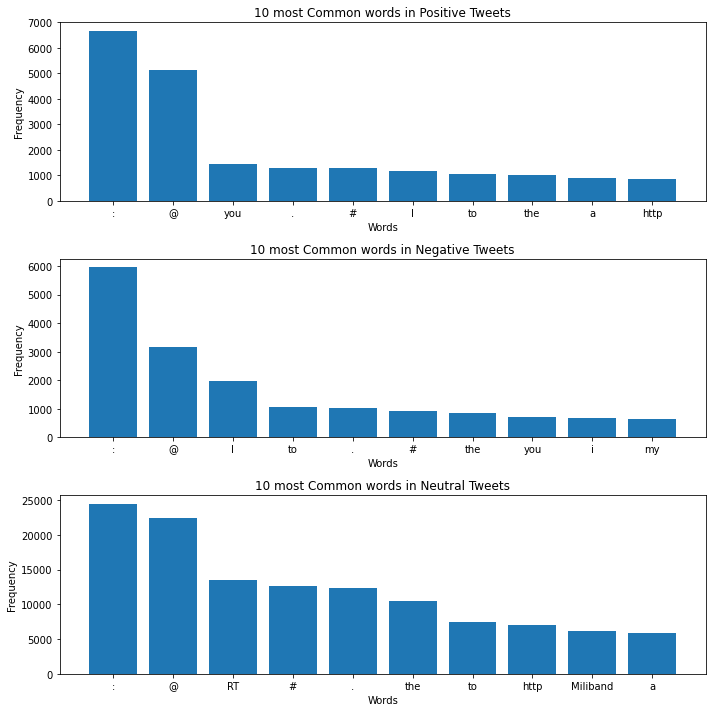

In [10]:
#finding the frequency distribution of top 10 words
pos_freq_dist = nltk.FreqDist(pos_words)
neg_freq_dist= nltk.FreqDist(neg_words)
neutral_freq_dist= nltk.FreqDist(neutral_words)

#plotting their frequency

top_pos_label=[word for word,freq in pos_freq_dist.most_common(10)]
top_pos_value=[freq for word,freq in pos_freq_dist.most_common(10)]

top_neg_label=[word for word,freq in neg_freq_dist.most_common(10)]
top_neg_value=[freq for word,freq in neg_freq_dist.most_common(10)]

top_neutral_label=[word for word,freq in neutral_freq_dist.most_common(10)]
top_neutral_value=[freq for word,freq in neutral_freq_dist.most_common(10)]

f,ax = plt.subplots(3,1,figsize=(10,10))

ax[0].bar(top_pos_label,top_pos_value)
ax[0].set_title("10 most Common words in Positive Tweets")
ax[0].set_xlabel("Words")
ax[0].set_ylabel("Frequency")

ax[1].bar(top_neg_label,top_neg_value)
ax[1].set_title("10 most Common words in Negative Tweets")
ax[1].set_xlabel("Words")
ax[1].set_ylabel("Frequency")

ax[2].bar(top_neutral_label,top_neutral_value)
ax[2].set_title("10 most Common words in Neutral Tweets")
ax[2].set_xlabel("Words")
ax[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

we can see that, removing stop words would have yielded a better result at this stage

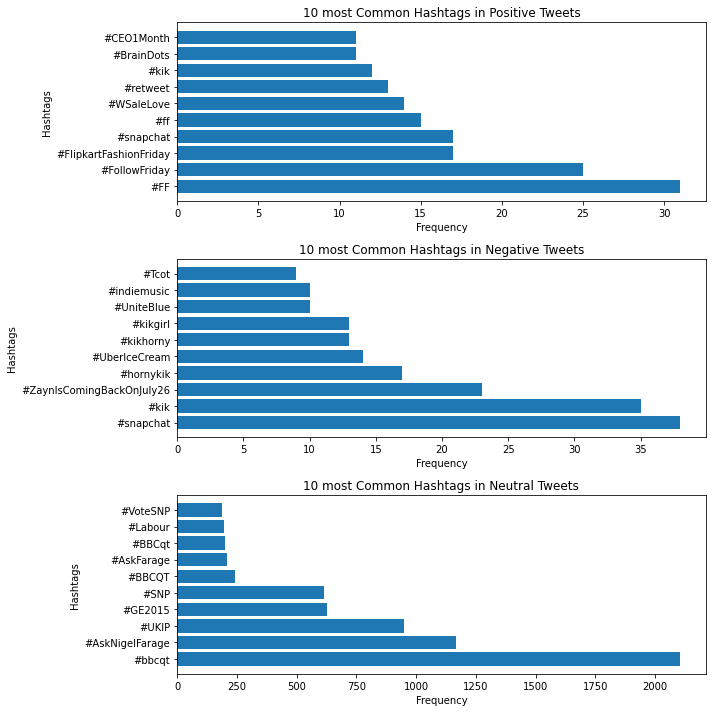

In [11]:
#analyzing the frequency of hashtags in the positive, negative, and neutral tweets 
hashtag_pattern = re.compile(r'#\w+')

pos_hashtags=hashtag_pattern.findall(combined_pos_tweets)
neg_hashtags=hashtag_pattern.findall(combined_neg_tweets)
neutral_hashtags=hashtag_pattern.findall(combined_neutral_tweets)

hash_pos_freq_dist = nltk.FreqDist(pos_hashtags)
hash_neg_freq_dist= nltk.FreqDist(neg_hashtags)
hash_neutral_freq_dist= nltk.FreqDist(neutral_hashtags)

#plotting their frequency

top_hash_pos_label=[word for word,freq in hash_pos_freq_dist.most_common(10)]
top_hash_pos_value=[freq for word,freq in hash_pos_freq_dist.most_common(10)]

top_hash_neg_label=[word for word,freq in hash_neg_freq_dist.most_common(10)]
top_hash_neg_value=[freq for word,freq in hash_neg_freq_dist.most_common(10)]

top_hash_neutral_label=[word for word,freq in hash_neutral_freq_dist.most_common(10)]
top_hash_neutral_value=[freq for word,freq in hash_neutral_freq_dist.most_common(10)]

f,ax = plt.subplots(3,1,figsize=(10,10))

ax[0].barh(top_hash_pos_label,top_hash_pos_value)
ax[0].set_title("10 most Common Hashtags in Positive Tweets")
ax[0].set_ylabel("Hashtags")
ax[0].set_xlabel("Frequency")

ax[1].barh(top_hash_neg_label,top_hash_neg_value)
ax[1].set_title("10 most Common Hashtags in Negative Tweets")
ax[1].set_ylabel("Hashtags")
ax[1].set_xlabel("Frequency")

ax[2].barh(top_hash_neutral_label,top_hash_neutral_value)
ax[2].set_title("10 most Common Hashtags in Neutral Tweets")
ax[2].set_ylabel("Hashtags")
ax[2].set_xlabel("Frequency")


plt.tight_layout()
plt.show()

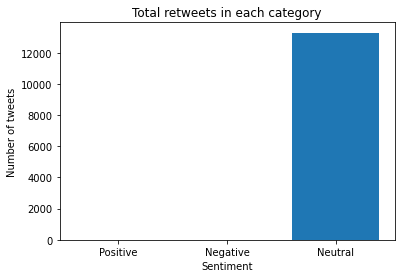

In [12]:
#analyzing the frequency of retweets in the positive, negative, and neutral tweets 
retweet_pattern = re.compile(r'^RT\b') #matches any tweet that starts with the letters RT followed by a word boundary

def find_count(tweets):
  count=0
  for tweet in tweets:
    if retweet_pattern.search(tweet):
      count+=1
  return count

lables=["Positive","Negative","Neutral"]
#index (0=positive retweets, 1=negative retweets,2=neutral retweets)
values=[find_count(pos_tweets),find_count(neg_tweets),find_count(neutral_tweets)]

plt.bar(labels,values)
plt.title("Total retweets in each category")
plt.xlabel("Sentiment")
plt.ylabel("Number of tweets")
plt.show()

In [13]:
#already done in 1.2 displaying first 10 words in each category instead
print("First 10 tokenized words of Positive tweets:")
print(pos_words[:10])
print("First 10 tokenized words of Negative tweets:")
print(neg_words[:10])
print("First 10 tokenized words of Neutral tweets:")
print(neutral_words[:10])

First 10 tokenized words of Positive tweets:
['#', 'FollowFriday', '@', 'France', 'Inte', '@', 'PKuchly57', '@', 'Milipol', 'Paris']
First 10 tokenized words of Negative tweets:
['hopeless', 'for', 'tmr', ':', 'Everything', 'in', 'the', 'kids', 'section', 'of']
First 10 tokenized words of Neutral tweets:
['RT', '@', 'KirkKus', ':', 'Indirect', 'cost', 'of', 'the', 'UK', 'being']


In [14]:
from nltk.corpus import stopwords

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

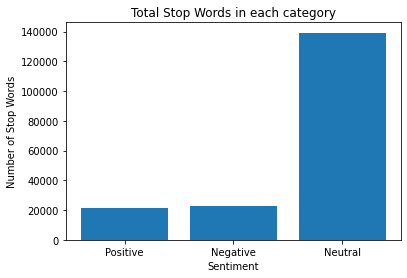

In [16]:
#removing stop words
stop_words = set(stopwords.words('english'))

def remove_stop_words_and_count(words):
    count=0
    temp=[]
    for word in words:
      if word.lower() not in stop_words:
        temp.append(word)
      else:
        count+=1
    return temp,count

#removing stopwords and counting their occurances as well for plotting
pos_words_processed,pos_sw_count=remove_stop_words_and_count(pos_words)

neg_words_processed,neg_sw_count=remove_stop_words_and_count(neg_words)

neutral_words_processed,neutral_sw_count=remove_stop_words_and_count(neutral_words)

lables=['Positive','Negative','Neutral']
values=[pos_sw_count,neg_sw_count,neutral_sw_count]

plt.bar(lables,values)
plt.title("Total Stop Words in each category")
plt.xlabel("Sentiment")
plt.ylabel("Number of Stop Words")
plt.show()

In [17]:
print("Sample Output of each category after removing stop words: ")
print("-"*30)
print("Positive tweets words")
print(pos_words_processed[:100])
print("-"*30)
print("Negative tweets words")
print(neg_words_processed[:100])
print("-"*30)
print("Neutral tweets words")
print(neutral_words_processed[:100])
print("-"*30)

Sample Output of each category after removing stop words: 
------------------------------
Positive tweets words
['#', 'FollowFriday', '@', 'France', 'Inte', '@', 'PKuchly57', '@', 'Milipol', 'Paris', 'top', 'engaged', 'members', 'community', 'week', ':', '@', 'Lamb2ja', 'Hey', 'James', 'odd', ':', '/', 'Please', 'call', 'Contact', 'Centre', '02392441234', 'able', 'assist', ':', 'Many', 'thanks', '@', 'DespiteOfficial', 'listen', 'last', 'night', ':', 'Bleed', 'amazing', 'track', '.', 'Scotland', '@', '97sides', 'CONGRATS', ':', 'yeaaaah', 'yippppy', 'accnt', 'verified', 'rqst', 'succeed', 'got', 'blue', 'tick', 'mark', 'fb', 'profile', ':', '15', 'days', '@', 'BhaktisBanter', '@', 'PallaviRuhail', 'one', 'irresistible', ':', '#', 'FlipkartFashionFriday', 'http', ':', '//t.co/EbZ0L2VENM', 'like', 'keep', 'lovely', 'customers', 'waiting', 'long', 'hope', 'enjoy', 'Happy', 'Friday', 'LWWF', ':', 'https', ':', '//t.co/smyYriipxI', '@', 'Impatientraider', 'second', 'thought', '’', 'enough',

In [18]:
#normalizing
pos_words_processed=[word.lower() for word in pos_words_processed]

neg_words_processed=[word.lower() for word in neg_words_processed]

neutral_words_processed=[word.lower() for word in neutral_words_processed]

print("Sample Output of each category after normalization: ")
print("-"*30)
print("Positive tweets words")
print(pos_words_processed[:100])
print("-"*30)
print("Negative tweets words")
print(neg_words_processed[:100])
print("-"*30)
print("Neutral tweets words")
print(neutral_words_processed[:100])
print("-"*30)


Sample Output of each category after normalization: 
------------------------------
Positive tweets words
['#', 'followfriday', '@', 'france', 'inte', '@', 'pkuchly57', '@', 'milipol', 'paris', 'top', 'engaged', 'members', 'community', 'week', ':', '@', 'lamb2ja', 'hey', 'james', 'odd', ':', '/', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', ':', 'many', 'thanks', '@', 'despiteofficial', 'listen', 'last', 'night', ':', 'bleed', 'amazing', 'track', '.', 'scotland', '@', '97sides', 'congrats', ':', 'yeaaaah', 'yippppy', 'accnt', 'verified', 'rqst', 'succeed', 'got', 'blue', 'tick', 'mark', 'fb', 'profile', ':', '15', 'days', '@', 'bhaktisbanter', '@', 'pallaviruhail', 'one', 'irresistible', ':', '#', 'flipkartfashionfriday', 'http', ':', '//t.co/ebz0l2venm', 'like', 'keep', 'lovely', 'customers', 'waiting', 'long', 'hope', 'enjoy', 'happy', 'friday', 'lwwf', ':', 'https', ':', '//t.co/smyyriipxi', '@', 'impatientraider', 'second', 'thought', '’', 'enough', 'time

In [19]:
#extracting the words starting with '#' and '@'

#we have already extracted the words starting with '#' in the begining in 1.3

atsymbol_pattern = re.compile(r'@\w+')

pos_atsymbol=atsymbol_pattern.findall(combined_pos_tweets)
neg_atsymbol=atsymbol_pattern.findall(combined_neg_tweets)
neutral_atsymbol=atsymbol_pattern.findall(combined_neutral_tweets)

pos_dict={
    'hashtags':pos_hashtags,
    'usernames':pos_atsymbol,
    'text':pos_words_processed
    }

neg_dict={
    'hashtags':neg_hashtags,
    'usernames':neg_atsymbol,
    'text':neg_words_processed
}

neutral_dict={
    'hashtags':neutral_hashtags,
    'usernames':neutral_atsymbol,
    'text':neutral_words_processed
}

tweets_master_list=[pos_dict,neg_dict,neutral_dict]
tweets_master_list

[{'hashtags': ['#FollowFriday',
   '#FlipkartFashionFriday',
   '#FollowFriday',
   '#Nostalgia',
   '#TBS',
   '#KU',
   '#FollowFriday',
   '#Gobigorgohome',
   '#kik',
   '#kikme',
   '#lgbt',
   '#tinder',
   '#nsfw',
   '#akua',
   '#cumshot',
   '#nsn',
   '#PressRelease',
   '#NewsDistribution',
   '#FollowFriday',
   '#letsgetmessy',
   '#Jordan',
   '#etsy',
   '#boxroomcrafts',
   '#FollowFriday',
   '#AGNEZMO',
   '#FlipkartFashionFriday',
   '#FollowFriday',
   '#HappyBirthdayEmilyBett',
   '#eh',
   '#FollowFriday',
   '#HushedCallWithFraydoe',
   '#HushedPinWithSammy',
   '#FollowFriday',
   '#FollowFriday',
   '#FollowFriday',
   '#FollowFriday',
   '#FollowFriday',
   '#MasaanToday',
   '#MasaanToday',
   '#MasaanToday',
   '#MasaanToday',
   '#WSaleLove',
   '#FollowFriday',
   '#GiveItUp',
   '#KFCkitchentours',
   '#FollowFriday',
   '#traveling',
   '#traveler',
   '#yogyakarta',
   '#jeep',
   '#Indonesia',
   '#instamood',
   '#CheesyDelights',
   '#FollowFriday',

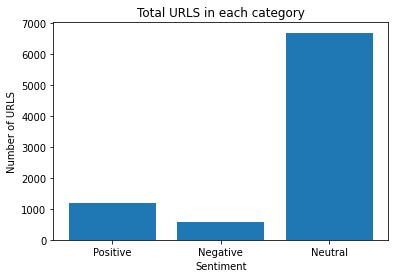

In [20]:
#identifying urls in each category
url_pattern = re.compile(r'https?:?/?/(?:[-\w.]|(?:%[\da-fA-F]{2}))+')

#extracting urls in each category and plotting
pos_urls=url_pattern.findall(combined_pos_tweets)
neg_urls=url_pattern.findall(combined_neg_tweets)
neutral_urls=url_pattern.findall(combined_neutral_tweets)

lables=['Positive','Negative','Neutral']
values=[len(pos_urls),len(neg_urls),len(neutral_urls)]

plt.bar(lables,values)
plt.title("Total URLS in each category")
plt.xlabel("Sentiment")
plt.ylabel("Number of URLS")
plt.show()

In [21]:
pos_urls[:10]

['http://t.co',
 'https://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co']

In [22]:
neg_urls[:10]

['https://t.co',
 'http://t.co',
 'https://t.co',
 'http://t.co',
 'https://t.co',
 'http://t.co',
 'https://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co']

In [23]:
neutral_urls[:10]

['http://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.co',
 'http://t.c',
 'https://t.co',
 'http://t.co',
 'http://t.co']

In [24]:
#functions taken and learned from https://medium.com/geekculture/text-preprocessing-how-to-handle-emoji-emoticon-641bbfa6e9e7

import pickle
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
with open('/content/Emoticon_Dict.p', 'rb') as fp:
    Emoticon_Dict = pickle.load(fp)
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in Emoticon_Dict) + u')')
    return emoticon_pattern.sub(r'', text)

In [25]:
#removing emojis
pos_text_processed=remove_emoticons(remove_emoji(combined_pos_tweets))
neg_text_processed=remove_emoticons(remove_emoji(combined_neg_tweets))
neutral_text_processed=remove_emoticons(remove_emoji(combined_neutral_tweets))

In [26]:
pos_text_processed

'#FollowFriday @France Inte @PKuchly57 @Milipol Paris for being top engaged members in my community this week :  @Lamb2ja Hey James  How odd  Please call our Contact Centre on 02392441234 and we will be able to assist you :  Many thanks  @DespiteOfficial we had a listen last night :  As You Bleed is an amazing track. When are you in Scotland   @97sides CONGRATS :  yeaaaah yippppy     my accnt verified rqst has succeed got a blue tick mark on my fb profile :  in 15 days @BhaktisBanter @PallaviRuhail This one is irresistible : \n#FlipkartFashionFriday http/t.co/EbZ0L2VENM We don t like to keep our lovely customers waiting for long  We hope you enjoy  Happy Friday    LWWF :  https/t.co/smyYriipxI @Impatientraider On second thought  there’s just not enough time for a DD :  But new shorts entering system. Sheep must be buying. Jgh   but we have to go to Bayan  bye As an act of mischievousness  am calling the ETL layer of our in house warehousing app Katamari.\n\nWell… as the name implies :p

In [27]:
neg_text_processed

'hopeless for tmr :  Everything in the kids section of IKEA is so cute. Shame I m nearly 19 in 2 months :  @Hegelbon That heart sliding into the waste basket. :  “@ketchBurning: I hate Japanese call him  bani  :  : ”\n\nMe too Dang starting next week I have  work  :  oh god  my babies  faces :  https/t.co/9fcwGvaki0 @RileyMcDonough make me smile :   @f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :  http/t.co/XvmTUikWln why :  @tahuodyy: sialan:  https/t.co/Hv1i0xcrL2  Athabasca glacier was there in #1948 :   #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http/t.co/dZZdqmf7Cz I have a really good m amp g idea but I m never going to meet them :    @Rampageinthebox mare ivan :  @SophiaMascardo happy trip  keep safe. see you soon :  :  I m so tired hahahah :  @GrumpyCockney With knee replacements they get you up  amp  about the same day. :     Ouch. relate to the  sweet n  sour  kind of  bi polar  people in yo

In [28]:
neutral_text_processed

'RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year  #BetterOffOut #UKIP VIDEO: Sturgeon on post election deals http/t.co/BTJwrpbmOY RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http/t.co… RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http/t.co/7eIU0c5Fm1 RT @thesundaypeople: UKIP s housing spokesman rakes in £800k in housing benefit from migrants.  http/t.co/GVwb9Rcb4w http/t.co/c1AZxcLh… RT @Nigel Farage: Make sure you tune in to #AskNigelFarage tonight on BBC 1 at 22:50  #UKIP http/t.co/ogHSc2Rsr2 RT @joannetallis: Ed Milliband is an embarrassment. Would you want him representing the UK    #bbcqt vote @Conservatives RT @abstex: The FT is backing the Tories. On an unrelated note  here s a photo of FT leader writer Jonathan Ford  next to Boris  http/t.c… RT @NivenJ1: “@George Osborne: Ed Miliband proved

In [29]:
#replacing urls with 'url'
for url in pos_urls:
  pos_text_processed=re.sub(url_pattern, 'url', pos_text_processed)
for url in neg_urls:
  neg_text_processed=re.sub(url_pattern, 'url', neg_text_processed)
for url in neutral_urls:
  neutral_text_processed=re.sub(url_pattern, 'url', neutral_text_processed)

#normalizing
pos_text_processed=(pos_text_processed.lower()).replace('\n',' ')
neg_text_processed=(neg_text_processed.lower()).replace("\n",' ')
neutral_text_processed=(neutral_text_processed.lower()).replace("\n",' ')

In [30]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
for punc in string.punctuation: #we can now remove remaning punctuations now
    pos_text_processed=pos_text_processed.replace(punc," ")
    neg_text_processed=neg_text_processed.replace(punc," ")
    neutral_text_processed=neutral_text_processed.replace(punc," ")

In [32]:
#tokenizing and removing stop words
pos_words_processed,_=remove_stop_words_and_count(nltk.tokenize.word_tokenize(pos_text_processed))

neg_words_processed,_=remove_stop_words_and_count(nltk.tokenize.word_tokenize(neg_text_processed))

neutral_words_processed,_=remove_stop_words_and_count(nltk.tokenize.word_tokenize(neutral_text_processed))

In [33]:
pos_words_processed[:10]

['followfriday',
 'france',
 'inte',
 'pkuchly57',
 'milipol',
 'paris',
 'top',
 'engaged',
 'members',
 'community']

In [34]:
neg_words_processed[:10]

['hopeless',
 'tmr',
 'everything',
 'kids',
 'section',
 'ikea',
 'cute',
 'shame',
 'nearly',
 '19']

In [35]:
neutral_words_processed[:10]

['rt',
 'kirkkus',
 'indirect',
 'cost',
 'uk',
 'eu',
 'estimated',
 'costing',
 'britain',
 '£170']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
cv = CountVectorizer()
cv2=CountVectorizer()
cv3=CountVectorizer()

pos=cv.fit_transform(pos_tweets)
pos_vocabulary=cv.vocabulary_
pos_wc=cv.transform(pos_tweets).toarray().sum(axis=0)
pos_word_freq=dict(zip(pos_vocabulary.keys(),pos_wc))

neg=cv2.fit_transform(neg_tweets)
neg_vocabulary=cv2.vocabulary_
neg_wc=cv2.transform(neg_tweets).toarray().sum(axis=0)
neg_word_freq=dict(zip(neg_vocabulary.keys(),neg_wc))

neutral=cv3.fit_transform(neutral_tweets)
neutral_vocabulary=cv3.vocabulary_
neutral_wc=cv3.transform(neutral_tweets).toarray().sum(axis=0)
neutral_word_freq=dict(zip(neutral_vocabulary.keys(),neutral_wc))


def sortt(lst):
  for i in range(len(lst)):
    for j in range(len(lst)-i-1):
      if lst[j][1]<lst[j+1][1]:
        temp=lst[j]
        lst[j]=lst[j+1]
        lst[j+1]=temp
  return lst


pos_word_freq_top10=sortt(list(pos_word_freq.items()))[:10]
neg_word_freq_top10=sortt(list(neg_word_freq.items()))[:10]
neutral_word_freq_top10=sortt(list(neutral_word_freq.items()))[:10]

In [38]:
print(pos_word_freq_top10)
print("-"*30)
print(neg_word_freq_top10)
print("-"*30)
print(neutral_word_freq_top10)

[('uktac', 1591), ('rav_bajwa', 1195), ('german', 1093), ('mehra_sachi', 1086), ('alixharrow', 856), ('fridaybmaria', 771), ('regret', 707), ('flowersandcards', 680), ('mutual', 556), ('specs', 507)]
------------------------------
[('amount', 1098), ('stocking', 919), ('txdc692sgb', 803), ('chel', 744), ('deedee_50fly', 718), ('nickyyyyyyyyyyyyyyyy', 699), ('gifs', 684), ('abc11_wtvd', 586), ('j11', 566), ('site', 477)]
------------------------------
[('ihatefobs', 13547), ('gents', 12540), ('kr5togjnoj', 7663), ('raymondonia', 7202), ('ensures', 6206), ('auste', 5748), ('hack', 5640), ('martcoopscooper', 5522), ('j0bqrlgqxx', 5447), ('blaming', 4545)]


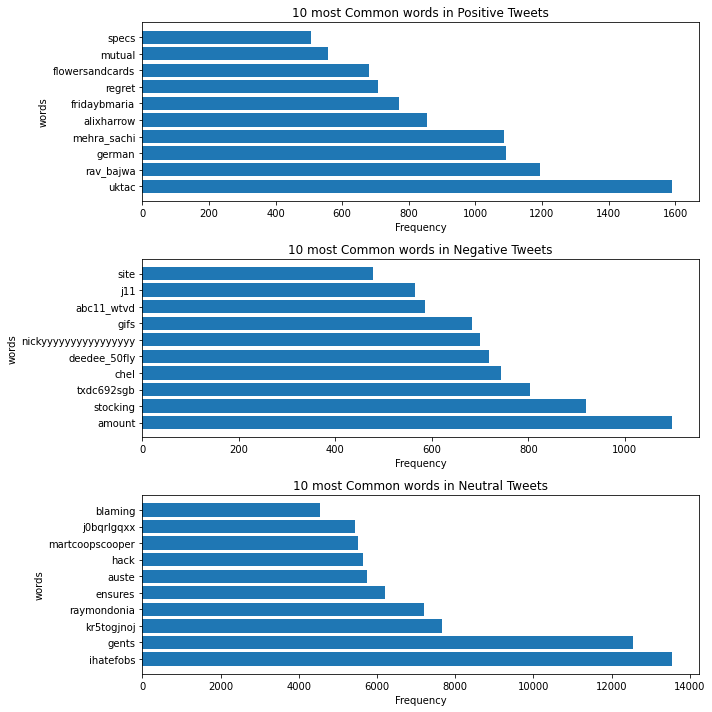

In [39]:

f,ax = plt.subplots(3,1,figsize=(10,10))

pos_w=[w for w,c in pos_word_freq_top10]
pos_c=[c for w,c in pos_word_freq_top10]

neg_w=[w for w,c in neg_word_freq_top10]
neg_c=[c for w,c in neg_word_freq_top10]

neutral_w=[w for w,c in neutral_word_freq_top10]
neutral_c=[c for w,c in neutral_word_freq_top10]

ax[0].barh(pos_w,pos_c)
ax[0].set_title("10 most Common words in Positive Tweets")
ax[0].set_ylabel("words")
ax[0].set_xlabel("Frequency")

ax[1].barh(neg_w,neg_c)
ax[1].set_title("10 most Common words in Negative Tweets")
ax[1].set_ylabel("words")
ax[1].set_xlabel("Frequency")

ax[2].barh(neutral_w,neutral_c)
ax[2].set_title("10 most Common words in Neutral Tweets")
ax[2].set_ylabel("words")
ax[2].set_xlabel("Frequency")


plt.tight_layout()
plt.show()

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
#pos tagging

pos_tags=nltk.pos_tag(pos_words_processed)
neg_tags=nltk.pos_tag(neg_words_processed)
neutral_tags=nltk.pos_tag(neutral_words_processed)

In [42]:
pos_tags_freq=nltk.FreqDist([tag for w,tag in pos_tags])
neg_tags_freq=nltk.FreqDist([tag for w,tag in neg_tags])
neutral_tags_freq=nltk.FreqDist([tag for w,tag in neutral_tags])

print([pos_tags_freq.most_common(10)])
print([neg_tags_freq.most_common(10)])
print([neutral_tags_freq.most_common(10)])

[[('NN', 14032), ('JJ', 8133), ('NNS', 2867), ('VBP', 2369), ('RB', 1858), ('CD', 1282), ('VBG', 1133), ('VBD', 1101), ('VB', 1023), ('IN', 629)]]
[[('NN', 11676), ('JJ', 6565), ('NNS', 2066), ('RB', 2035), ('VBP', 1943), ('VBD', 1284), ('VB', 1119), ('VBG', 1083), ('CD', 955), ('IN', 624)]]
[[('NN', 112879), ('JJ', 52571), ('NNS', 21239), ('VBP', 14616), ('RB', 11315), ('VBD', 9847), ('VBG', 8355), ('CD', 8352), ('VB', 6513), ('VBZ', 4661)]]


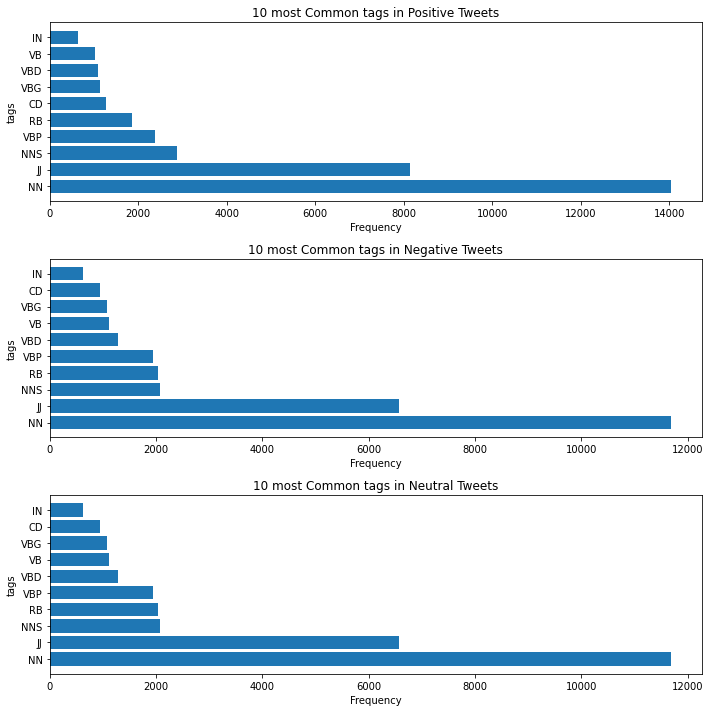

In [46]:

f,ax = plt.subplots(3,1,figsize=(10,10))

pos_t=[t for t,c in pos_tags_freq.most_common(10)]
pos_c=[c for t,c in pos_tags_freq.most_common(10)]

neg_t=[t for t,c in neg_tags_freq.most_common(10)]
neg_c=[c for t,c in neg_tags_freq.most_common(10)]

neutral_t=[t for t,c in neg_tags_freq.most_common(10)]
neutral_c=[c for t,c in neg_tags_freq.most_common(10)]

ax[0].barh(pos_t,pos_c)
ax[0].set_title("10 most Common tags in Positive Tweets")
ax[0].set_ylabel("tags")
ax[0].set_xlabel("Frequency")

ax[1].barh(neg_t,neg_c)
ax[1].set_title("10 most Common tags in Negative Tweets")
ax[1].set_ylabel("tags")
ax[1].set_xlabel("Frequency")

ax[2].barh(neutral_t,neutral_c)
ax[2].set_title("10 most Common tags in Neutral Tweets")
ax[2].set_ylabel("tags")
ax[2].set_xlabel("Frequency")


plt.tight_layout()
plt.show()

In [51]:
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [47]:
from nltk.stem import WordNetLemmatizer

In [52]:
#lemmatizing
lem=WordNetLemmatizer()
pos_words_processed=[lem.lemmatize(word) for word in pos_words_processed]
neg_words_processed=[lem.lemmatize(word) for word in neg_words_processed]
neutral_words_processed=[lem.lemmatize(word) for word in neutral_words_processed]

In [53]:
#after lematizing
pos_words_processed[:20]

['followfriday',
 'france',
 'inte',
 'pkuchly57',
 'milipol',
 'paris',
 'top',
 'engaged',
 'member',
 'community',
 'week',
 'lamb2ja',
 'hey',
 'james',
 'odd',
 'please',
 'call',
 'contact',
 'centre',
 '02392441234']

In [54]:
neg_words_processed[:20]

['hopeless',
 'tmr',
 'everything',
 'kid',
 'section',
 'ikea',
 'cute',
 'shame',
 'nearly',
 '19',
 '2',
 'month',
 'hegelbon',
 'heart',
 'sliding',
 'waste',
 'basket',
 '“',
 'ketchburning',
 'hate']

In [55]:
neutral_words_processed[:20]

['rt',
 'kirkkus',
 'indirect',
 'cost',
 'uk',
 'eu',
 'estimated',
 'costing',
 'britain',
 '£170',
 'billion',
 'per',
 'year',
 'betteroffout',
 'ukip',
 'video',
 'sturgeon',
 'post',
 'election',
 'deal']

In [56]:
from nltk.util import ngrams

In [76]:
#for positive tweets
pos_unigrams=pos_words_processed
pos_bigrams = list(ngrams(pos_unigrams, 2))
pos_trigrams = list(ngrams(pos_unigrams, 3))

print(pos_unigrams)
print(pos_bigrams)
print(pos_trigrams)



['followfriday', 'france', 'inte', 'pkuchly57', 'milipol', 'paris', 'top', 'engaged', 'member', 'community', 'week', 'lamb2ja', 'hey', 'james', 'odd', 'please', 'call', 'contact', 'centre', '02392441234', 'able', 'assist', 'many', 'thanks', 'despiteofficial', 'listen', 'last', 'night', 'bleed', 'amazing', 'track', 'scotland', '97sides', 'congrats', 'yeaaaah', 'yippppy', 'accnt', 'verified', 'rqst', 'succeed', 'got', 'blue', 'tick', 'mark', 'fb', 'profile', '15', 'day', 'bhaktisbanter', 'pallaviruhail', 'one', 'irresistible', 'flipkartfashionfriday', 'url', 'ebz0l2venm', 'like', 'keep', 'lovely', 'customer', 'waiting', 'long', 'hope', 'enjoy', 'happy', 'friday', 'lwwf', 'url', 'smyyriipxi', 'impatientraider', 'second', 'thought', '’', 'enough', 'time', 'dd', 'new', 'short', 'entering', 'system', 'sheep', 'must', 'buying', 'jgh', 'go', 'bayan', 'bye', 'act', 'mischievousness', 'calling', 'etl', 'layer', 'house', 'warehousing', 'app', 'katamari', 'well…', 'name', 'implies', 'p', 'followfr

In [77]:
#for negative tweets
neg_unigrams=neg_words_processed
neg_bigrams = list(ngrams(neg_unigrams, 2))
neg_trigrams = list(ngrams(neg_unigrams, 3))

print(neg_unigrams)
print(neg_bigrams)
print(neg_trigrams)

['hopeless', 'tmr', 'everything', 'kid', 'section', 'ikea', 'cute', 'shame', 'nearly', '19', '2', 'month', 'hegelbon', 'heart', 'sliding', 'waste', 'basket', '“', 'ketchburning', 'hate', 'japanese', 'call', 'ban', '”', 'dang', 'starting', 'next', 'week', 'work', 'oh', 'god', 'baby', 'face', 'url', '9fcwgvaki0', 'rileymcdonough', 'make', 'smile', 'f0ggstar', 'stuartthull', 'work', 'neighbour', 'motor', 'asked', 'said', 'hate', 'update', 'search', 'url', 'xvmtuikwln', 'tahuodyy', 'sialan', 'url', 'hv1i0xcrl2', 'athabasca', 'glacier', '1948', 'athabasca', 'glacier', 'jasper', 'jaspernationalpark', 'alberta', 'explorealberta', '…', 'url', 'dzzdqmf7cz', 'really', 'good', 'amp', 'g', 'idea', 'never', 'going', 'meet', 'rampageinthebox', 'mare', 'ivan', 'sophiamascardo', 'happy', 'trip', 'keep', 'safe', 'see', 'soon', 'tired', 'hahahah', 'grumpycockney', 'knee', 'replacement', 'get', 'amp', 'day', 'ouch', 'relate', 'sweet', 'n', 'sour', 'kind', 'bi', 'polar', 'people', 'life', 'cuz', 'life', '

In [78]:
#for neutral tweets
neutral_unigrams=neutral_words_processed
neutral_bigrams = list(ngrams(neutral_unigrams, 2))
neutral_trigrams = list(ngrams(neutral_unigrams, 3))

print(neutral_unigrams[:100])
print(neutral_bigrams[:100])
print(neutral_trigrams[:100])

['rt', 'kirkkus', 'indirect', 'cost', 'uk', 'eu', 'estimated', 'costing', 'britain', '£170', 'billion', 'per', 'year', 'betteroffout', 'ukip', 'video', 'sturgeon', 'post', 'election', 'deal', 'url', 'btjwrpbmoy', 'rt', 'laboureoin', 'economy', 'growing', '3', 'time', 'faster', 'day', 'david', 'cameron', 'became', 'prime', 'minister', 'today', 'bbcqt', 'url…', 'rt', 'greglauder', 'ukip', 'east', 'lothian', 'candidate', 'look', '16', 'still', 'msn', 'addy', 'url', '7eiu0c5fm1', 'rt', 'thesundaypeople', 'ukip', 'housing', 'spokesman', 'rake', '£800k', 'housing', 'benefit', 'migrant', 'url', 'gvwb9rcb4w', 'url', 'c1azxclh…', 'rt', 'nigel', 'farage', 'make', 'sure', 'tune', 'asknigelfarage', 'tonight', 'bbc', '1', '22', '50', 'ukip', 'url', 'oghsc2rsr2', 'rt', 'joannetallis', 'ed', 'milliband', 'embarrassment', 'would', 'want', 'representing', 'uk', 'bbcqt', 'vote', 'conservative', 'rt', 'abstex', 'ft', 'backing', 'tory', 'unrelated', 'note', 'photo']
[('rt', 'kirkkus'), ('kirkkus', 'indire